Spam Classification Accuracy: 0.8533333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        75
           1       0.85      0.85      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



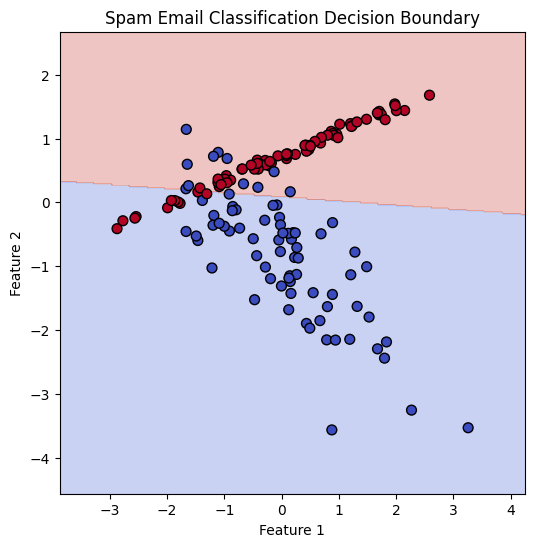

In [1]:
# SVM for Spam Email Classification

# 1️⃣ Import libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 2️⃣ Generate synthetic dataset
# 2 informative features, 2 classes (spam or not spam)
X_spam, y_spam = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# 3️⃣ Split into train/test sets
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(
    X_spam, y_spam, test_size=0.3, random_state=42
)

# 4️⃣ Feature scaling
scaler = StandardScaler()
X_train_spam = scaler.fit_transform(X_train_spam)
X_test_spam = scaler.transform(X_test_spam)

# 5️⃣ Train SVM (linear kernel)
model_spam = SVC(kernel='linear', random_state=0)
model_spam.fit(X_train_spam, y_train_spam)

# 6️⃣ Make predictions
y_pred_spam = model_spam.predict(X_test_spam)

# 7️⃣ Evaluation
print("Spam Classification Accuracy:", accuracy_score(y_test_spam, y_pred_spam))
print("\nClassification Report:\n", classification_report(y_test_spam, y_pred_spam))

# 8️⃣ Plot decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=50)
    plt.title("Spam Email Classification Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model_spam, X_test_spam, y_test_spam)
